In [128]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import math

In [129]:
model_name = 'model'
data_path = './data/'
df = pd.read_csv(data_path + 'driving_log.csv')
batch_size = 32
samples_epoch = batch_size * 6
n_epochs = 1

In [131]:
def generate_samples(batch_size):
    means = np.zeros(0)
    size = df.iloc[:,3].size
    offset = 0.15

    n_bin = 5
    
    for i in range(0, size - batch_size):
        samples = df.ix[range(i, i + batch_size), range(n_bin + 1)]
        mean = np.absolute( samples.iloc[:,3] ).mean()
        means = np.append(means, [mean])

    bins = np.linspace(means.min(), means.max(), num=8)
    bin_inds = np.digitize(means, bins, right= True)
    bin_inds = np.append(bin_inds, np.zeros(df.shape[0] - bin_inds.size))

    while True:
        # choose a bin
        upper_bound = np.random.choice(np.arange(1,n_bin + 1), p=[0.05,0.05, 0.1, 0.3, 0.5])
        indices = df.iloc[bin_inds == upper_bound].index
        # choose a sequence from the bin
        index_begin = np.random.choice(indices)

        imgs = np.zeros([0, 160, 320, 3], dtype='uint8')
        steerings = np.zeros(0)

        camera = 0
        
        if upper_bound < n_bin:
            camera = np.random.randint(3)

        flip = np.random.randint(2)

        for i in range(batch_size):
            file_path = df.iloc[index_begin + i, camera]
            
            _, _, filename = file_path.partition('IMG\\')
            img = plt.imread(data_path + 'IMG/' + filename)
            
            steering = df.iloc[index_begin + i, 3]

            if camera == 1:
                steering += offset
            elif camera == 2:
                steering -= offset

            if flip:
                img = np.fliplr(img)
                steering = -steering

            imgs = np.append(imgs, [img], axis=0)
            steerings = np.append(steerings, [steering], axis=0)

        yield imgs, steerings

In [132]:
def plot_imgs(imgs, steerings):
    plt.subplots_adjust()
    count = imgs.shape[0]
    n_col = 3
    n_row = math.ceil(count / n_col)
    n_row = 2 if n_row == 1 else n_row
    fig, ax = plt.subplots(n_row, n_col, figsize=[16, 6 * n_row/2] )
    for i in range(n_row):
        for j in range(n_col):
            ij = j + i * n_col
            if ij < count:
                ax[i,j].axis('off')
                ax[i,j].set_title(steerings[ij])
                ax[i,j].imshow(imgs[ij])

frame with steering percentage 0.555


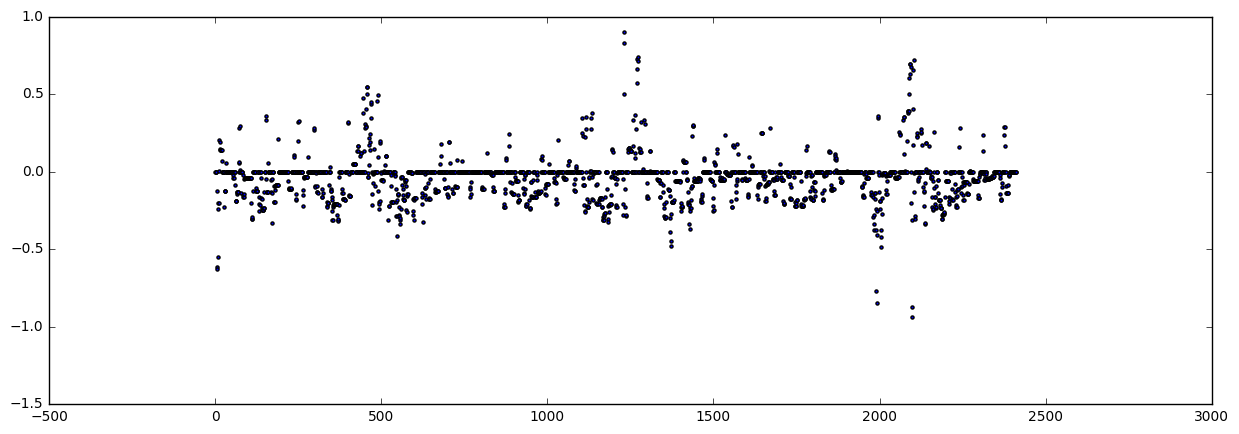

In [133]:
fig = plt.figure(figsize=[15, 5])
ax = fig.add_subplot(1,1,1)
ax.scatter(np.arange(df.iloc[:,3].shape[0]), df.iloc[:,3].values, marker='.')
steering_per = len(df[df.iloc[:,3] != 0]) / len(df)
print ('frame with steering percentage {:.3f}'.format(steering_per))


In [134]:
for imgs, steerings in generate_samples(16):
    global my_images, my_steerings
    my_images, my_steerings = imgs, steerings
    break


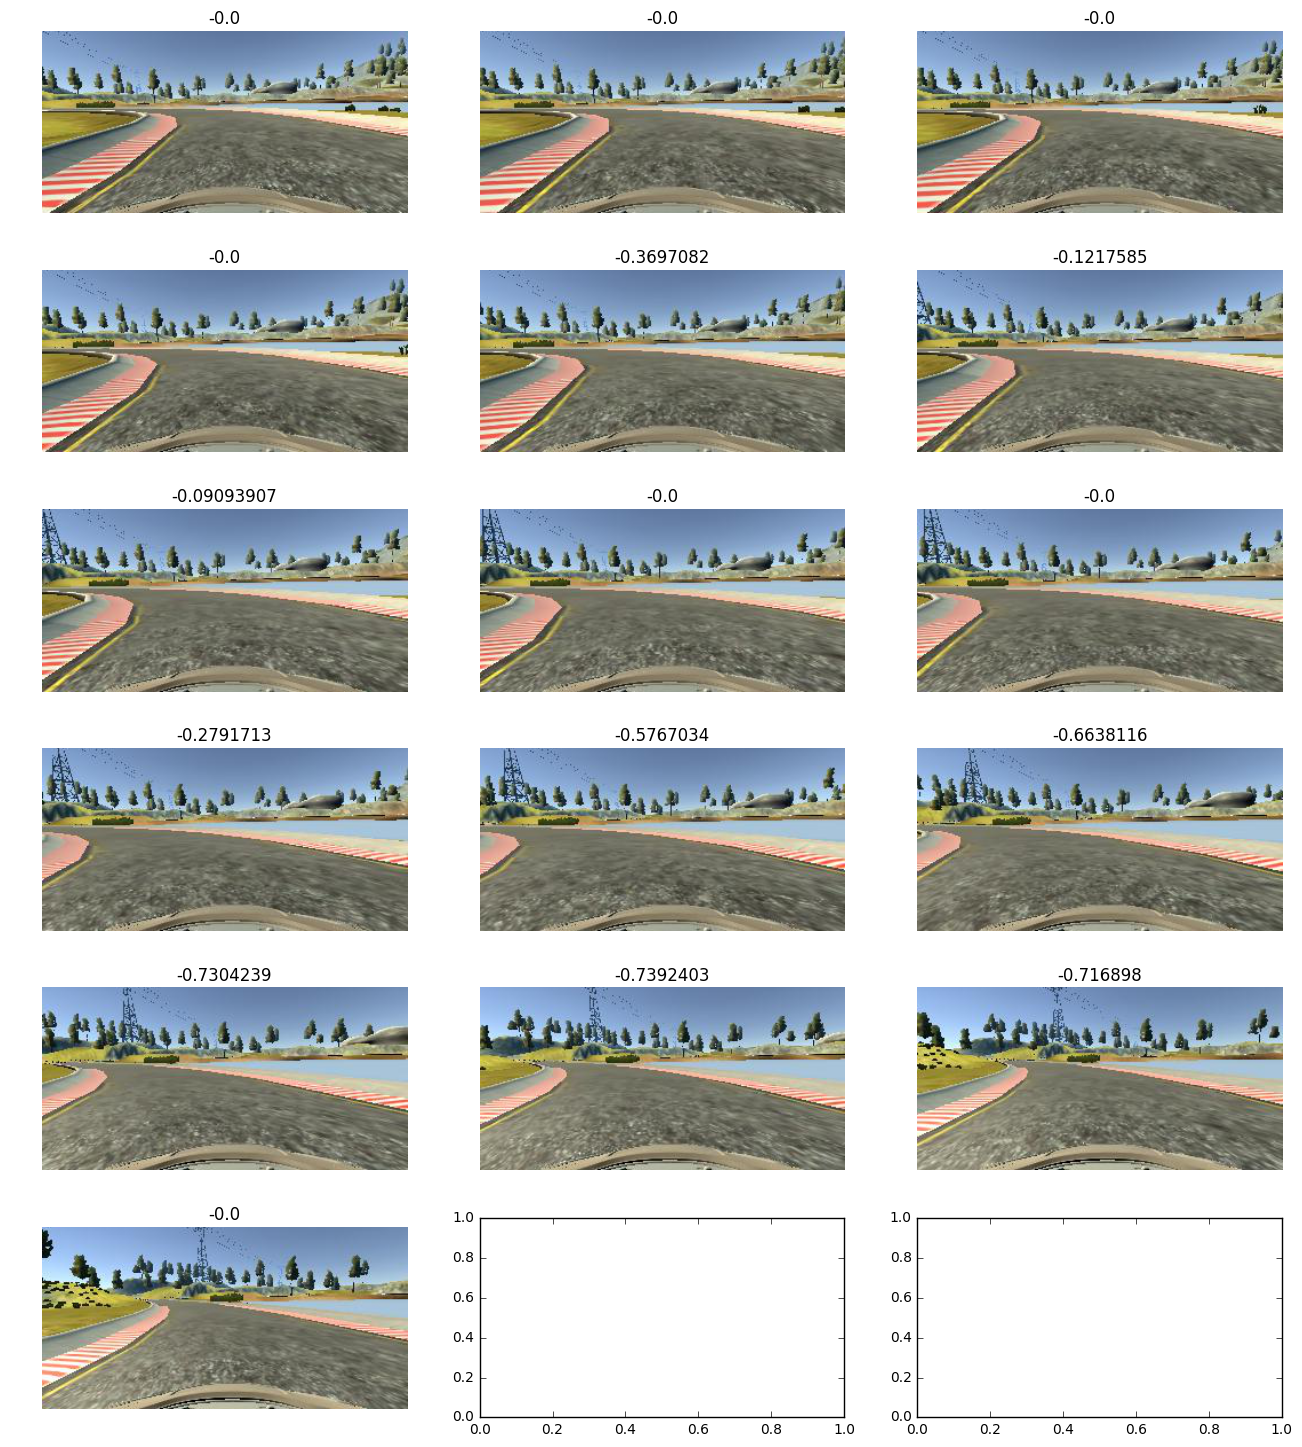

In [135]:
plot_imgs(my_images, my_steerings)

In [ ]:
model.pred_steering().summary()